In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import final as fn
%matplotlib inline

In [18]:
# read data
pit = fn.read_data('data/pit_stops.csv')
result = fn.read_data('data/results.csv')
status = fn.read_data('data/status.csv')
race = fn.read_data('data/races.csv')
circuit = fn.read_data('data/circuits.csv')
driver = fn.read_data('data/drivers.csv')

In [3]:
# merge data due to the pit stop data, we only analyze the current decade
merge_df = pd.merge(pit, race[['raceId','year','round','circuitId','name','date']], on='raceId', how='left')
merge_df = pd.merge(merge_df,result[['raceId','driverId','positionOrder', 'laps', 'time','statusId']], on=['raceId','driverId'], how = 'left', suffixes=('_pit', '_result'))
merge_df = merge_df.merge(status, on='statusId', how='left').merge(driver[['driverId', 'driverRef']], on = 'driverId', how='left')

In [4]:
# result for merged table
merge_df

,raceId,driverId,stop,lap,time_pit,duration,milliseconds,year,round,circuitId,name,date,positionOrder,laps,time_result,statusId,status,driverRef
0,841,153,1,1,17:05:23,26.898,26898,2011,1,1,Australian Grand Prix,2011-03-27,11,57,\N,11,+1 Lap,alguersuari
1,841,30,1,1,17:05:52,25.021,25021,2011,1,1,Australian Grand Prix,2011-03-27,19,19,\N,4,Collision,michael_schumacher
2,841,17,1,11,17:20:48,23.426,23426,2011,1,1,Australian Grand Prix,2011-03-27,5,58,+38.171,1,Finished,webber
3,841,4,1,12,17:22:34,23.251,23251,2011,1,1,Australian Grand Prix,2011-03-27,4,58,+31.772,1,Finished,alonso
4,841,13,1,13,17:24:10,23.842,23842,2011,1,1,Australian Grand Prix,2011-03-27,7,58,+1:25.186,1,Finished,massa
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8065,1052,832,2,37,19:09:53,24.341,24341,2021,1,3,Bahrain Grand Prix,2021-03-28,8,56,+67.100,1,Finished,sainz
8066,1052,815,3,38,19:11:20,24.191,24191,2021,1,3,Bahrain Grand Prix,2021-03-28,5,56,+52.047,1,Finished,perez
8067,1052,830,2,39,19:12:13,23.848,23848,2021,1,3,Bahrain Grand Prix,2021-03-28,2,56,+0.745,1,Finished,max_verstappen
8068,1052,842,3,39,19:13:55,24.983,24983,2021,1,3,Bahrain Grand Prix,2021-03-28,17,52,\N,31,Retired,gasly


In [5]:
# filter DNF data, only count finished races
fn.select_finished_data(merge_df)

In [6]:
# get max lap in each race
race_lap = fn.get_max_lap(merge_df)

In [7]:
# divide the pit stop times per race by driver (rank 1 in each race to find max laps)
pit_stop = merge_df.groupby(by=['raceId', 'driverId'], as_index=False)[['stop', 'lap']].max()

In [8]:
# 1 pit stop
pit_once = pit_stop[pit_stop['stop']==1]
pit_once_temp = fn.count_proportion(pit_once, race_lap, 1)
pit_once_temp

In [10]:
# 2 pit stop
pit_twice = pit_stop[pit_stop['stop']==2]
# back to merge_df df to get the first pit stop data
pit_twice= pd.merge(pit_twice[['raceId', 'driverId']],merge_df[['raceId', 'driverId', 'stop', 'lap']], on=['raceId', 'driverId'], how = 'left')
# then we have all data with pit stop twice
pit_twice_temp = fn.count_proportion(pit_twice, race_lap, 2)
pit_twice_temp

,raceId,driverId,stop,lap,laps,proportion
0,841,1,1,16,58,0.28
1,841,1,2,36,58,0.62
2,841,2,1,15,58,0.26
3,841,2,2,30,58,0.52
4,841,15,1,16,58,0.28
...,...,...,...,...,...,...
2776,1052,847,2,36,56,0.64
2777,1052,852,1,15,56,0.27
2778,1052,852,2,33,56,0.59
2779,1052,854,1,14,56,0.25


In [11]:
# 3 pit stops and each stop or proportion
pit_third = pit_stop[pit_stop['stop']==3]
pit_third= pd.merge(pit_third[['raceId', 'driverId']],merge_df[['raceId', 'driverId', 'stop', 'lap']], on=['raceId', 'driverId'], how = 'left')
pit_third_temp = fn.count_proportion(pit_third, race_lap, 2)
pit_third_temp

,raceId,driverId,stop,lap,laps,proportion
0,841,4,1,12,58,0.21
1,841,4,2,27,58,0.47
2,841,4,3,42,58,0.72
3,841,13,1,13,58,0.22
4,841,13,2,31,58,0.53
...,...,...,...,...,...,...
2172,1052,815,2,19,56,0.34
2173,1052,815,3,38,56,0.68
2174,1052,822,1,16,56,0.29
2175,1052,822,2,30,56,0.54


In [12]:
# 4 pit stops and each stop or proportion
pit_four = pit_stop[pit_stop['stop']==4]
pit_four= pd.merge(pit_four[['raceId', 'driverId']],merge_df[['raceId', 'driverId', 'stop', 'lap']], on=['raceId', 'driverId'], how = 'left')
pit_four_temp = fn.count_proportion(pit_four, race_lap, 2)
pit_four_temp

,raceId,driverId,stop,lap,laps,proportion
0,842,1,1,12,56,0.21
1,842,1,2,24,56,0.43
2,842,1,3,37,56,0.66
3,842,1,4,52,56,0.93
4,842,4,1,14,56,0.25
...,...,...,...,...,...,...
751,1045,830,4,46,57,0.81
752,1046,847,1,45,87,0.52
753,1046,847,2,62,87,0.71
754,1046,847,3,63,87,0.72


### Conditions we couldn’t divided from the dataset:
1. safety car (because everyone usually pit)<br>
2. rainy days<br>
3. other condition like collisions. <br>

### Conditions we could eliminate from the dataset:<br>
Driver did not finish the race. (DNF)  <br>



<module 'matplotlib.pyplot' from '/opt/anaconda3/lib/python3.8/site-packages/matplotlib/pyplot.py'>

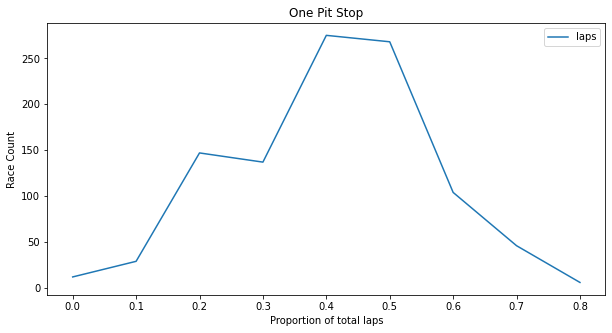

In [24]:
# plot for pit stop once 
pit_once_plot = pit_once_temp.groupby(by=['proportion']).count().reset_index()
fn.plot_line_chart(pit_once_plot, 1, 'One Pit Stop')

#### From the plot above, we could see that if the team chooses only pit stop once in the total race, then they tend to pit during the half the race.



pit_twice_plot = fn.df_group_plot(pit_twice_temp)

<module 'matplotlib.pyplot' from '/opt/anaconda3/lib/python3.8/site-packages/matplotlib/pyplot.py'>

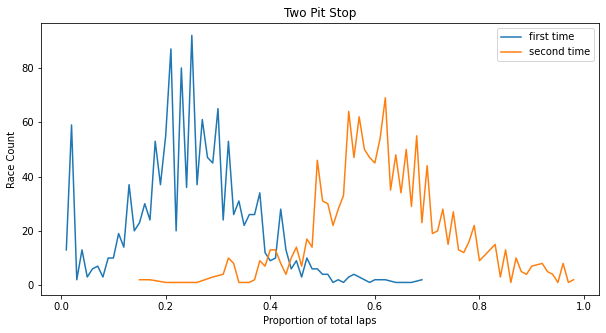

In [15]:
fn.plot_line_chart(pit_twice_plot, 2, 'Two Pit Stop')

#### From the plot above, we could see that if the team chooses to pit stop twice in the total race, most of the teams will choose to pit during the 0.2~0.3 total race laps at the first time, which is pretty close to 1/3. Furthermore, the second time pit tends to be happened aroung 0.6 of total race laps, which is also very close to 2/3.



<module 'matplotlib.pyplot' from '/opt/anaconda3/lib/python3.8/site-packages/matplotlib/pyplot.py'>

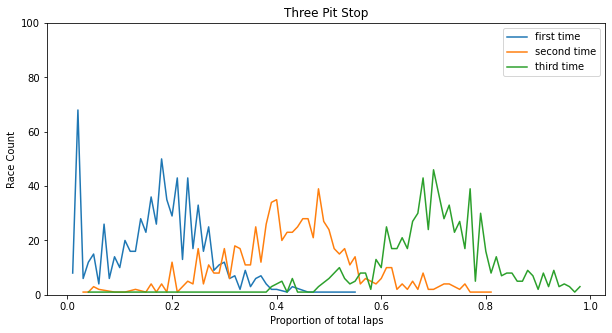

In [16]:
pit_third_plot = fn.df_group_plot(pit_third_temp)
fn.plot_line_chart(pit_third_plot, 3, 'Three Pit Stop')

<module 'matplotlib.pyplot' from '/opt/anaconda3/lib/python3.8/site-packages/matplotlib/pyplot.py'>

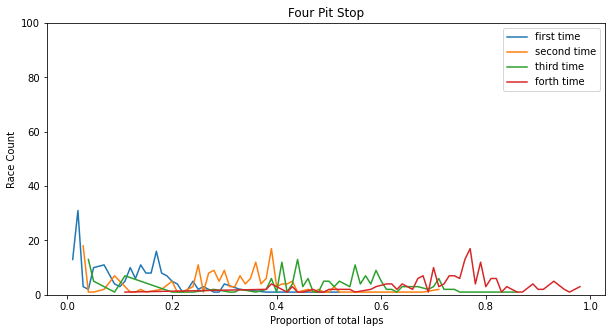

In [17]:
pit_four_plot = fn.df_group_plot(pit_four_temp)
fn.plot_line_chart(pit_four_plot, 4, 'Four Pit Stop')

#### If we see the plot 3 and 4 pit stops, they both have a peak in the beginning of the race. This might because in the beginning of the race, drivers will fight for the leading position and there might be some collisions between them. But since these data are already filtered as finished race. It means, even they have collision, they just need to pit and back to the race again. But we don’t think we could say they have significant difference when they need to pit stop.



### Result

#### When pit stop times <=2: We don't have strong evidence to reject the hypothesis 2, since the plots show that most of the pit stop timing are average based on total pit times. <br>But for pit stop times >= 3, we could reject it since there’s no significant evidence showed the result we expected.